# King County

In [1]:
%%capture
import sys
!ln -s ../syntheticml .
!{sys.executable} -m pip install -r ../requirements.txt
!{sys.executable} -m pip install -U kaleido
!{sys.executable} -m pip install git+https://github.com/mostly-ai/virtualdatalab.git

In [2]:
import pandas as pd
df = pd.read_csv('../datasets/kingcounty/raw/kc_house_data.csv');
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16669,9141100073,20140826T000000,500000.0,4,2.50,2040,6685,2.0,0,0,...,8,2040,0,1998,0,98133,47.7413,-122.354,1890,8253
18844,3303900090,20141023T000000,898000.0,3,2.25,2650,12845,1.0,0,3,...,9,1770,880,1977,0,98034,47.7209,-122.256,2650,12902
4082,3751601501,20140716T000000,382450.0,3,2.50,2220,20531,2.0,0,0,...,8,2220,0,1998,0,98001,47.2864,-122.264,2420,19249


In [3]:
%%capture
from syntheticml.data.synthetic import Synthetic, MODELS
syn = Synthetic(df, 
        id="id",
        #category_columns=("condition", "floors", "grade", "view", "waterfront", "yr_built", "yr_renovated", "zipcode", "bathrooms", "bedrooms",),
        category_columns=("condition", "floors", "grade", "view", "waterfront", "zipcode", "bathrooms", "bedrooms",),
        exclude_columns=('date',),
        synthetic_folder = "../datasets/kingcounty/synth",
        models=MODELS.keys(),
        target_column="price",
        n_sample = 21613,
        max_cpu_pool=5
)

In [4]:
%%capture  --no-display
syn.process(remaining_columns=('view','condition','waterfront'))
syn.process_scores()


## Metricas
### Continuas

In [6]:
metrics = syn.current_metrics()
metrics[~metrics.is_categorical].dropna(axis=1, how='all')

,name,top5,top5_freq,top5_prob,is_categorical,nobs,missing,mean,std_err,upper_ci,...,mode_freq,median,0.1%,1.0%,5.0%,25.0%,75.0%,95.0%,99.0%,99.9%
0,long,"[-122.29, -122.362, -122.288, -122.3, -122.372]","[100, 88, 81, 81, 81]","[0.00578368999421631, 0.005089647194910353, 0....",False,17290.0,0.0,-1.222141e+02,1.068498e-03,-1.222120e+02,...,0.005784,-1.222310e+02,-1.224970e+02,-1.224080e+02,-1.223870e+02,-1.223290e+02,-1.221250e+02,-1.219790e+02,-1.217870e+02,-1.216989e+02
2,sqft_living15,"[1440, 1540, 1560, 1500, 1610]","[156, 154, 152, 137, 136]","[0.009022556390977444, 0.008906882591093117, 0...",False,17290.0,0.0,1.982905e+03,5.180812e+00,1.993059e+03,...,0.009023,1.840000e+03,7.400000e+02,9.500000e+02,1.140000e+03,1.480000e+03,2.360000e+03,3.280000e+03,4.050000e+03,4.985550e+03
4,sqft_lot,"[5000, 4000, 6000, 7200, 4800]","[301, 209, 208, 179, 98]","[0.017408906882591092, 0.012087912087912088, 0...",False,17290.0,0.0,1.479895e+04,2.953747e+02,1.537787e+04,...,0.017409,7.600000e+03,7.371560e+02,1.005000e+03,1.756000e+03,5.001250e+03,1.060675e+04,4.299910e+04,2.121922e+05,4.356000e+05
6,yr_built,"[2014, 2005, 2006, 2004, 2007]","[449, 371, 366, 350, 347]","[0.025968768074031232, 0.02145748987854251, 0....",False,17290.0,0.0,1.971108e+03,2.238595e-01,1.971547e+03,...,0.025969,1.975000e+03,1.900000e+03,1.904000e+03,1.915000e+03,1.951000e+03,1.997000e+03,2.011000e+03,2.014000e+03,2.015000e+03
7,id,"[5249801440, 7409700215, 5127001320, 220670021...","[2, 2, 2, 2, 2]","[0.0001156737998843262, 0.0001156737998843262,...",False,17290.0,0.0,4.580764e+09,2.187780e+07,4.623644e+09,...,0.000116,3.905000e+09,1.150043e+07,1.230348e+08,4.827001e+08,2.123042e+09,7.305301e+09,9.297300e+09,9.560800e+09,9.834201e+09
8,lat,"[47.5402, 47.6875, 47.686, 47.6624, 47.5518]","[14, 13, 13, 13, 13]","[0.0008097165991902834, 0.0007518796992481203,...",False,17290.0,0.0,4.756033e+01,1.052783e-03,4.756239e+01,...,0.000810,4.757180e+01,4.719273e+01,4.725733e+01,4.731070e+01,4.747200e+01,4.767800e+01,4.774995e+01,4.777281e+01,4.777670e+01
10,sqft_living,"[1400, 1300, 1720, 1250, 1540]","[109, 107, 106, 106, 105]","[0.006304222093695778, 0.006188548293811452, 0...",False,17290.0,0.0,2.073895e+03,6.900053e+00,2.087419e+03,...,0.006304,1.910000e+03,5.228900e+02,7.200000e+02,9.400000e+02,1.430000e+03,2.540000e+03,3.740000e+03,4.921100e+03,6.965550e+03
12,price,"[350000.0, 450000.0, 425000.0, 550000.0, 32500...","[143, 140, 123, 123, 123]","[0.008270676691729323, 0.008097165991902834, 0...",False,17290.0,0.0,5.377680e+05,2.748954e+03,5.431559e+05,...,0.008271,4.500000e+05,9.500000e+04,1.544670e+05,2.100000e+05,3.201500e+05,6.400000e+05,1.150000e+06,1.950000e+06,3.331995e+06
14,sqft_lot15,"[5000, 4000, 6000, 7200, 4800]","[349, 289, 224, 160, 120]","[0.02018507807981492, 0.016714864083285135, 0....",False,17290.0,0.0,1.272506e+04,2.093312e+02,1.313534e+04,...,0.020185,7.615000e+03,8.862890e+02,1.189000e+03,1.965000e+03,5.083000e+03,1.004600e+04,3.682165e+04,1.682959e+05,3.069984e+05
16,sqft_basement,"[0, 600, 700, 500, 800]","[10553, 182, 169, 167, 164]","[0.6103528050896472, 0.010526315789473684, 0.0...",False,17290.0,0.0,2.879327e+02,3.336545e+00,2.944722e+02,...,0.610353,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+02,1.180000e+03,1.650000e+03,2.324220e+03


### Categoricas

In [7]:
metrics[metrics.is_categorical].dropna(axis=1, how='all')

,name,top5,top5_freq,top5_prob,is_categorical,nobs,missing
1,floors,"[1.0, 2.0, 1.5, 3.0, 2.5]","[8488, 6628, 1523, 517, 128]","[0.4909196067090804, 0.383342972816657, 0.0880...",True,17290.0,0.0
3,zipcode,"[98103, 98038, 98115, 98052, 98117]","[489, 473, 462, 459, 455]","[0.028282244071717755, 0.027356853672643146, 0...",True,17290.0,0.0
5,bedrooms,"[3, 4, 2, 5, 6]","[7865, 5477, 2237, 1292, 212]","[0.4548872180451128, 0.3167727009832273, 0.129...",True,17290.0,0.0
9,waterfront,"[0, 1]","[17166, 124]","[0.9928282244071718, 0.007171775592828224]",True,17290.0,0.0
11,grade,"[7, 8, 9, 6, 10]","[7201, 4879, 2072, 1620, 915]","[0.4164835164835165, 0.28218623481781374, 0.11...",True,17290.0,0.0
13,bathrooms,"[2.5, 1.0, 1.75, 2.25, 2.0]","[4333, 3088, 2425, 1621, 1526]","[0.2506072874493927, 0.17860034702139965, 0.14...",True,17290.0,0.0
15,condition,"[3, 4, 5, 2, 1]","[11248, 4512, 1364, 139, 27]","[0.6505494505494506, 0.2609600925390399, 0.078...",True,17290.0,0.0
18,view,"[0, 2, 3, 1, 4]","[15586, 783, 396, 275, 250]","[0.901445922498554, 0.045286292654713706, 0.02...",True,17290.0,0.0


## Scores

In [9]:
best_model = "smote-enc_21613"
avg = syn.scores[syn.scores["type"] == "avg"]
avg.sort_values("score", ascending=False)

,type,score,DCR ST min,DCR ST median,DCR SH min,DCR SH median,DCR TH min,DCR TH median
name,,,,,,,,
smote-enc_21613,avg,0.928700,0.006174,0.422347,0.012918,0.425980,0.0,0.11664
smote-enc_noise_21613,avg,0.928700,0.006174,0.422347,0.012918,0.425980,0.0,0.11664
gaussiancopula_noise_21613_wfixed_columns,avg,0.854984,0.091020,0.475614,0.090613,0.472640,0.0,0.11664
gaussiancopula_noise_21613,avg,0.854440,0.102114,0.483256,0.115330,0.474402,0.0,0.11664
tvae_21613_wfixed_columns,avg,0.849229,0.042911,0.465096,0.056200,0.465631,0.0,0.11664
tvae_21613,avg,0.843846,0.036588,0.467025,0.054479,0.465056,0.0,0.11664
tvae_noise_21613_wfixed_columns,avg,0.841944,0.033565,0.445433,0.046140,0.442363,0.0,0.11664
tvae_noise_21613,avg,0.840412,0.050551,0.447048,0.053288,0.445025,0.0,0.11664
gaussiancopula_21613,avg,0.837340,0.098168,0.488424,0.082797,0.479571,0.0,0.11664


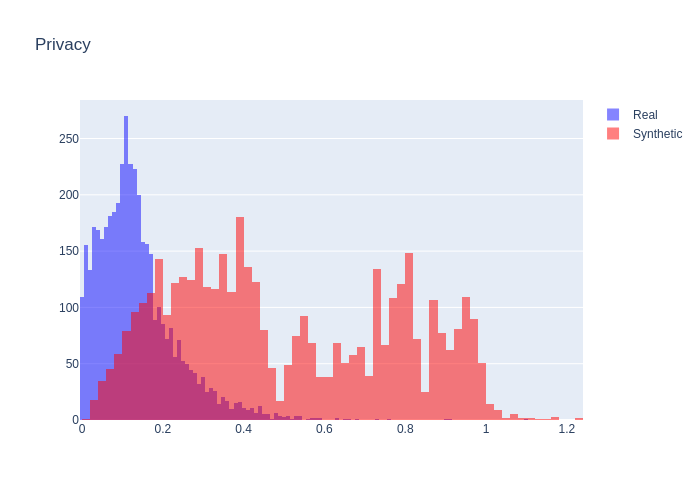

None

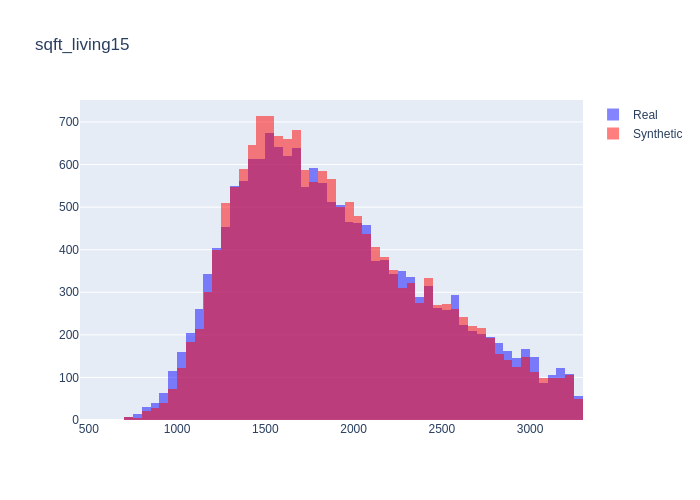

None

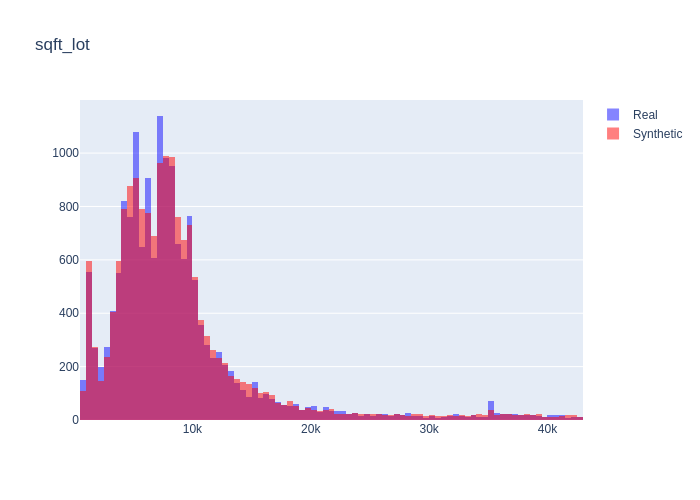

None

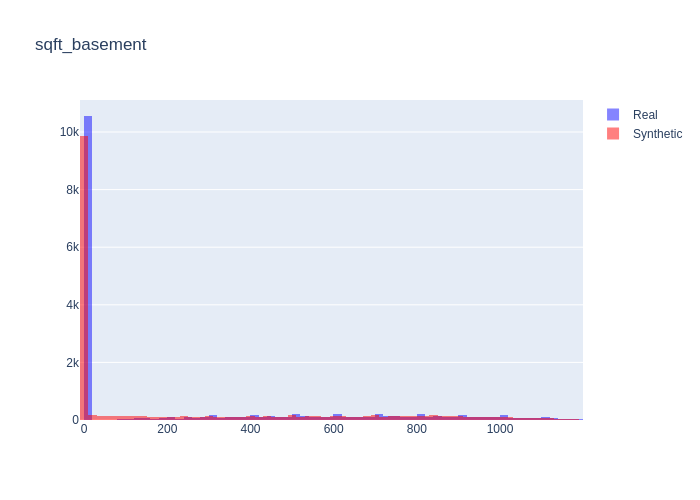

None

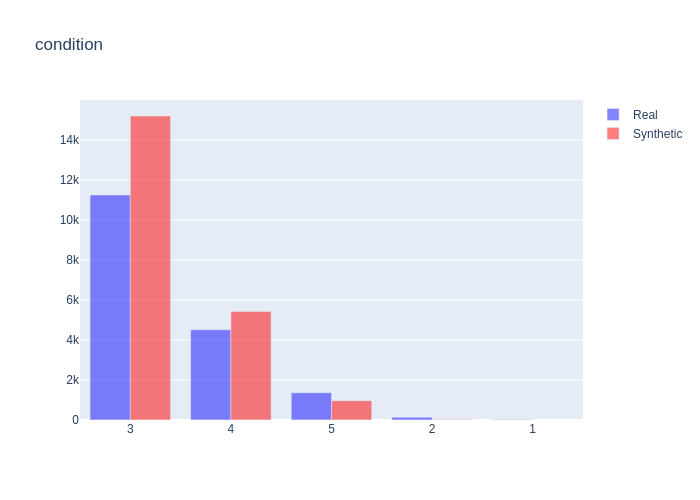

None

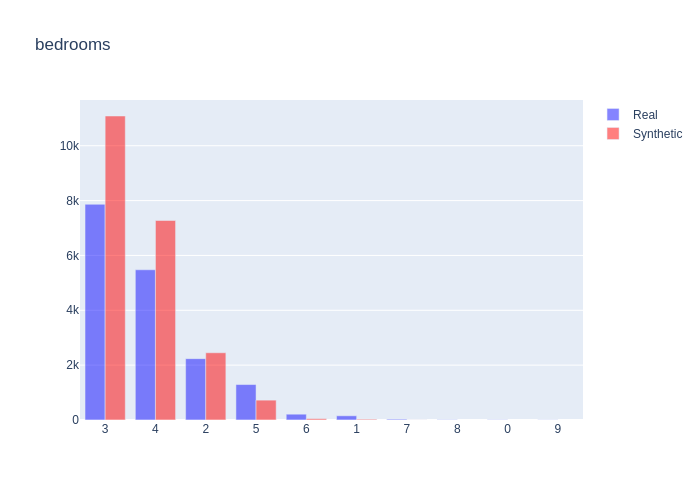

None

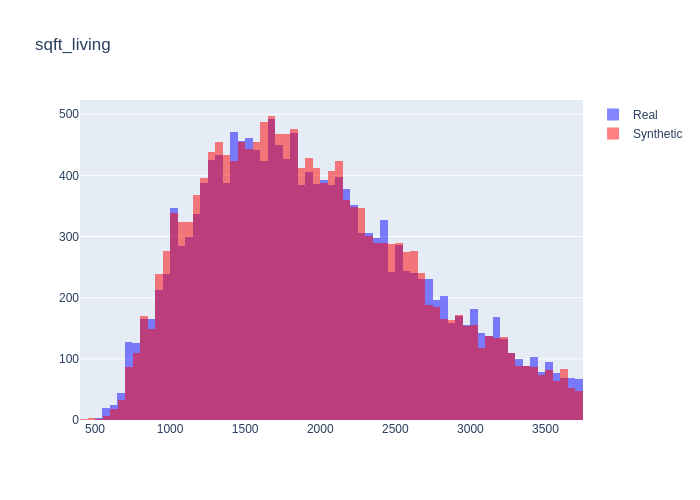

None

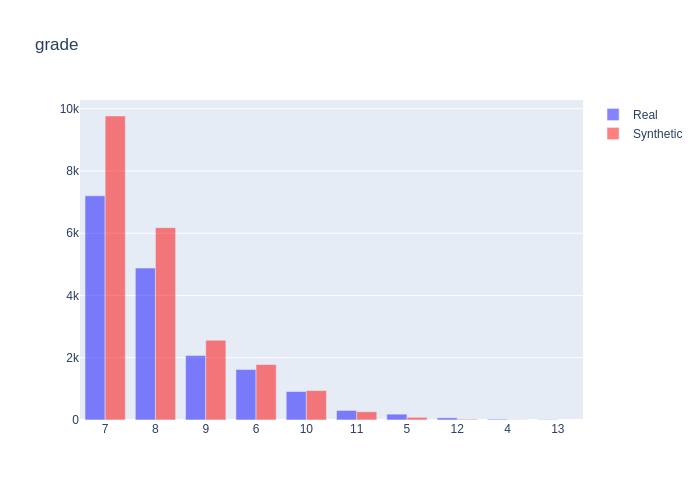

None

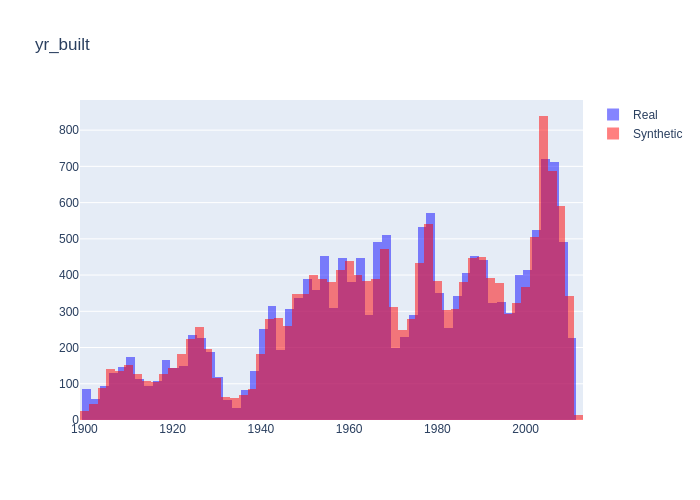

None

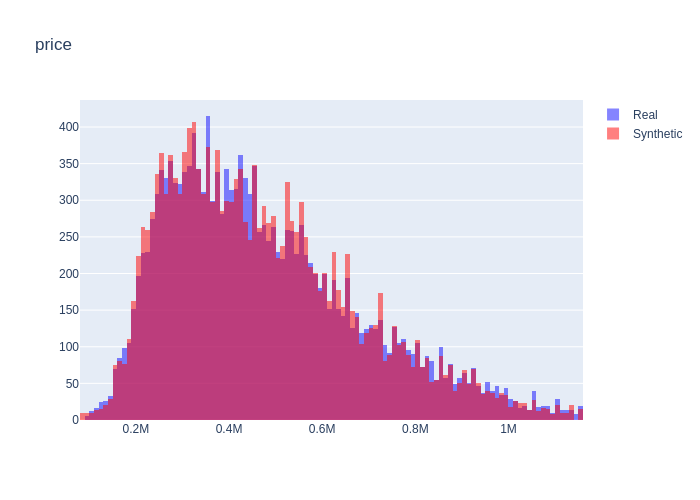

None

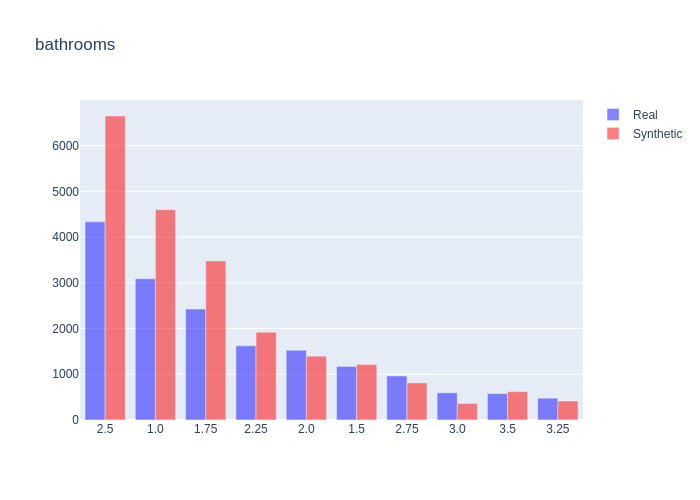

None

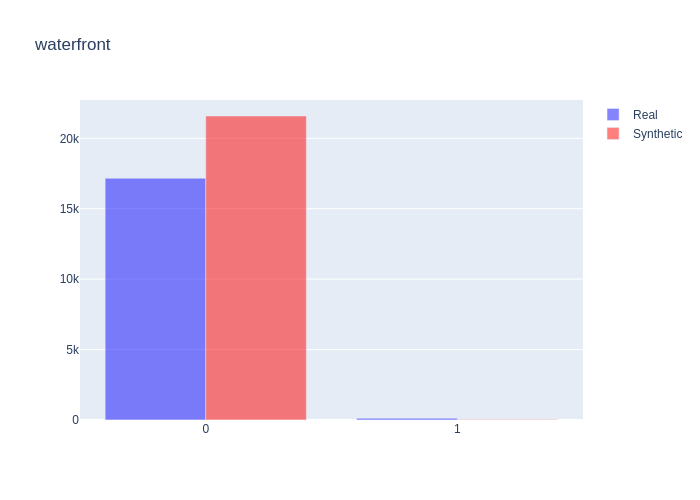

None

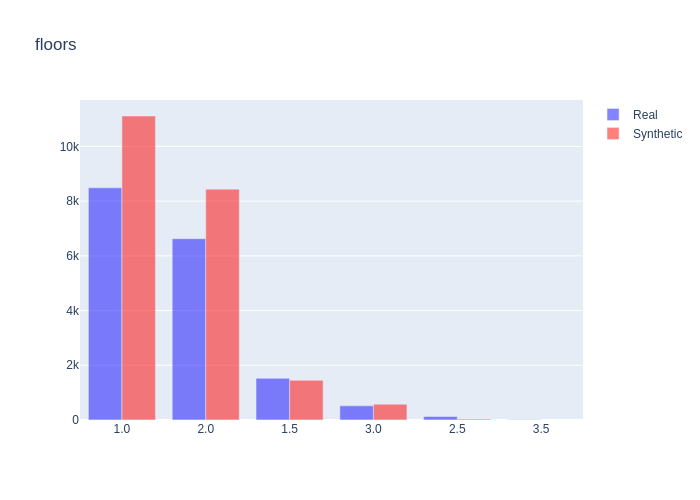

None

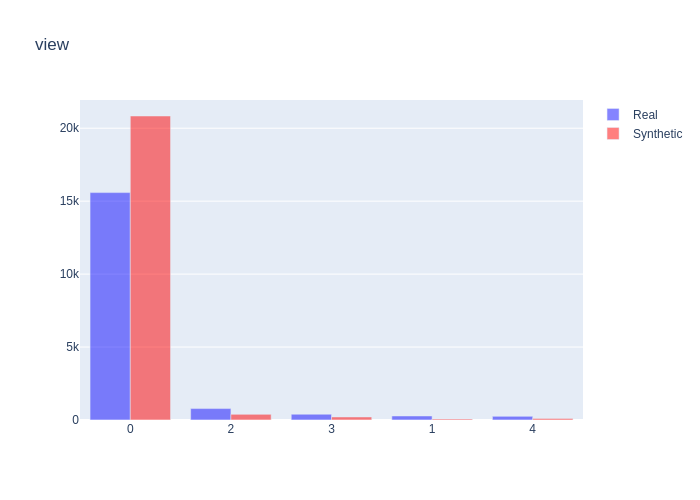

None

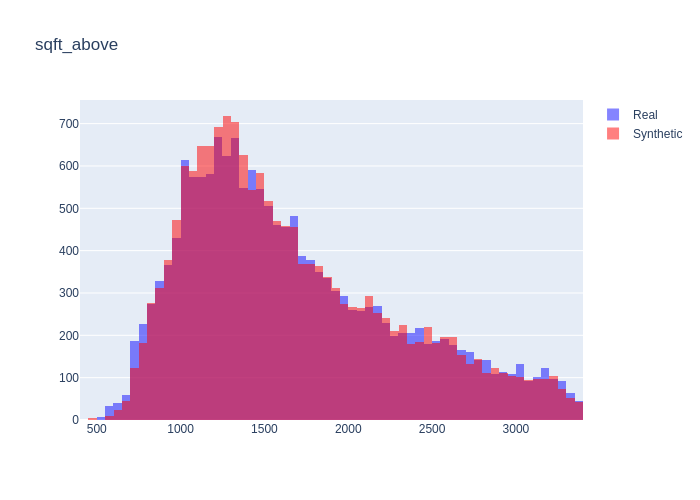

None

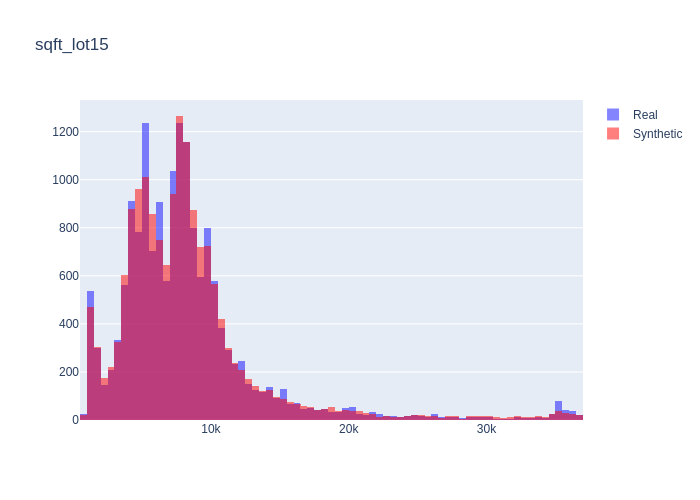

None

In [10]:
from syntheticml.data.charts import Charts
for fig in syn.get_charts(best_model, {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        display(fig.show("png"))

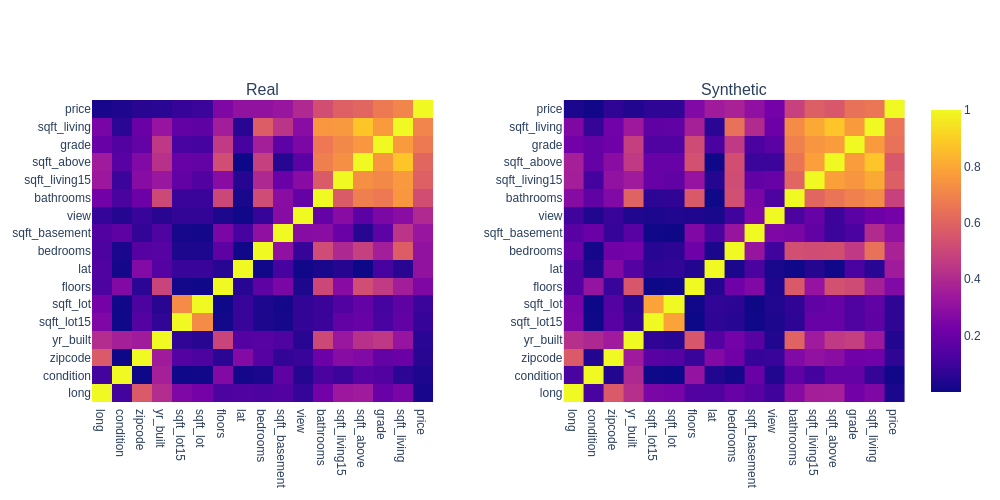

In [11]:
syn.charts.pair_corr(syn.df, syn.fake_data[best_model], {'id', 'waterfront', 'yr_renovated'}, "price").update_layout(dict(width=1000)).show("png")